In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
class ThresholdSwitch():
    def __init__(self,  R_off: float = 10_000_000_000, R_on: float = 1_0000, V_th: float = 0.3, V_hold: float = 0.05) -> None:
        self.R_off = R_off
        self.R_on = R_on
        self.V_th =V_th
        self.V_hold =V_hold
        self.state = 'off'

    def get_resistance(self, voltage: float):
        if (self.state == 'off') and ((voltage) < self.V_th):
            return self.R_off
        elif (self.state == 'off') and ((voltage) > self.V_th):
            self.state = 'on'
            return self.R_on
        elif (self.state == 'on') and ((voltage) > self.V_hold):
            return self.R_on
        elif (self.state == 'on') and ((voltage) < self.V_hold):
            self.state = 'off'
            return self.R_off

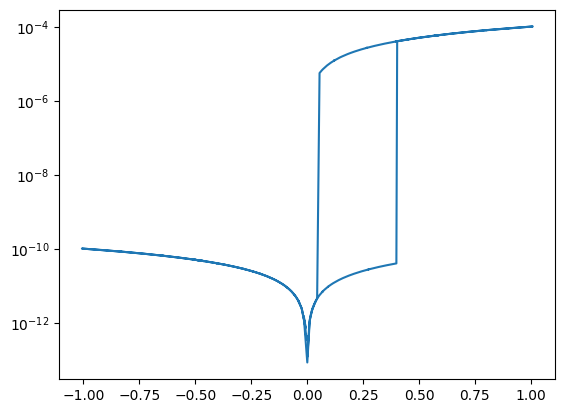

In [31]:
ts = ThresholdSwitch( V_th=0.4)
t  =np.linspace(0, np.pi, 1000)
V = np.sin(2 * t) + np.array([np.random.normal(0,0.005) for _ in t])
I = np.array([V[i] / ts.get_resistance(V[i]) for i in range(len(t))])

plt.plot(V, np.abs(I))
plt.yscale('log')

$$
C_m \frac{dV(t)}{dt} + \frac{V(t) - V_0}{R_m} = I_{inj}
$$

$$
V(t_{i+1}) = \left( I_{inj} -  \frac{V(t_i) - V_0}{R_m}\right) \frac{dt}{C_m} + V(t_i)
$$

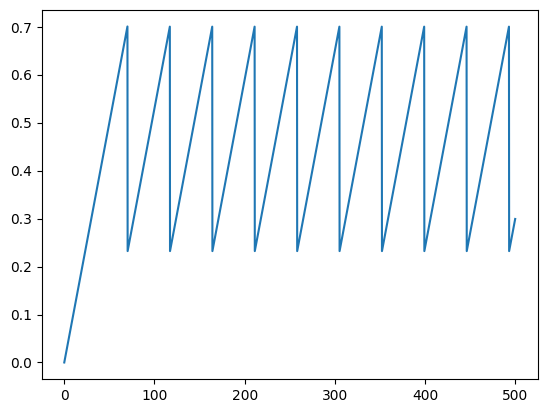

In [40]:
t = np.linspace(0, 500, 10000)
dt = t[1] - t[0]
I_inj = 1e-7
V_0 = 0.2
ts = ThresholdSwitch( V_th=0.5)
R_m = [ts.get_resistance(0)]
C_m = 1e-5
V = [0]
r = [ts.get_resistance(0)]
for i in range(len(t)-1):
    V.append((I_inj - (V[i] - V_0) / ts.get_resistance(V[i] - V_0)) * dt / C_m + V[i])
    r.append(ts.get_resistance(V[i] - V_0))

plt.plot(t, V)